In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('online_shoppers_intention.csv') #importing the dataset.
df = data.copy() 
df.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Counter({False: 10422, True: 1908})


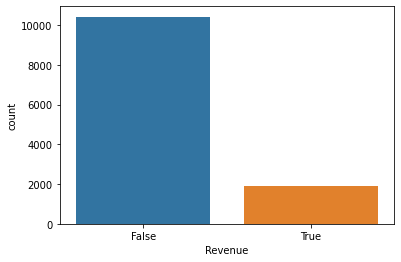

In [4]:
#Distribution of the attribute 'Revenue'
print(Counter(df['Revenue']))
sns.countplot(df['Revenue'])

In [5]:
#Finding the missing tuples
pd.DataFrame({'Missing' : df.isnull().sum()}).sort_values(by = ['Missing'], ascending=False).head(18)

,Missing
Administrative,0
Administrative_Duration,0
Weekend,0
VisitorType,0
TrafficType,0
Region,0
Browser,0
OperatingSystems,0
Month,0
SpecialDay,0


In [6]:
#Datatype of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
#Statistics of the attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


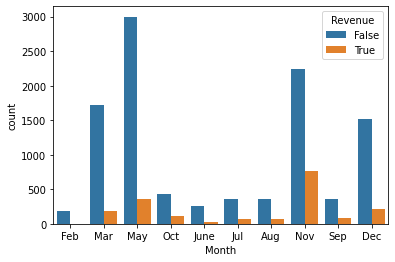

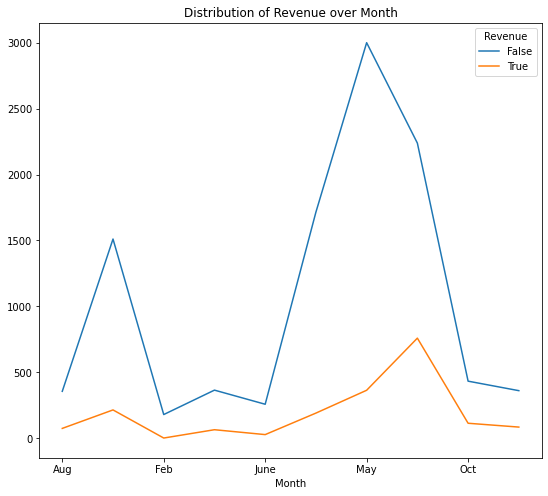

In [8]:
#Distribution of Revenue over month
sns.countplot(x=df['Month'], hue="Revenue", data=data)
pd.crosstab(df['Month'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over Month")
plt.show();

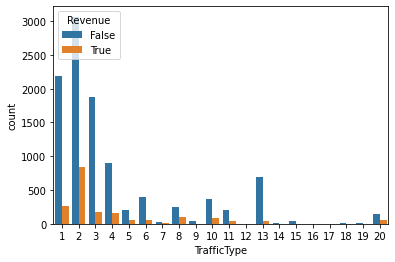

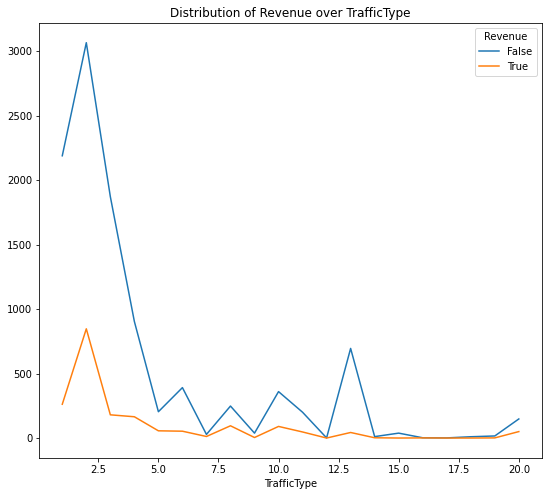

In [9]:
#Distribution of Revenue over Traffictype
sns.countplot(x=df['TrafficType'], hue="Revenue", data=data)
pd.crosstab(df['TrafficType'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over TrafficType")
plt.show();

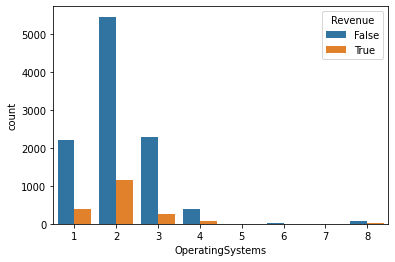

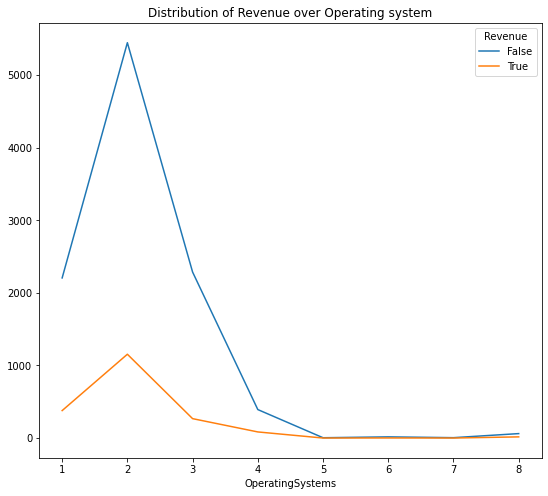

In [10]:
#Distribution of Revenue over OperatingSystems
sns.countplot(x=df['OperatingSystems'], hue="Revenue", data=data)
pd.crosstab(df['OperatingSystems'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over Operating system")
plt.show();

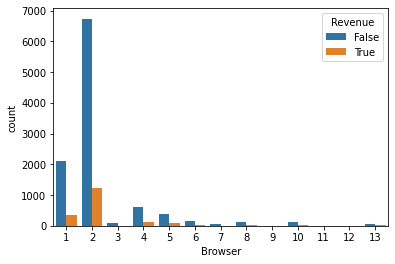

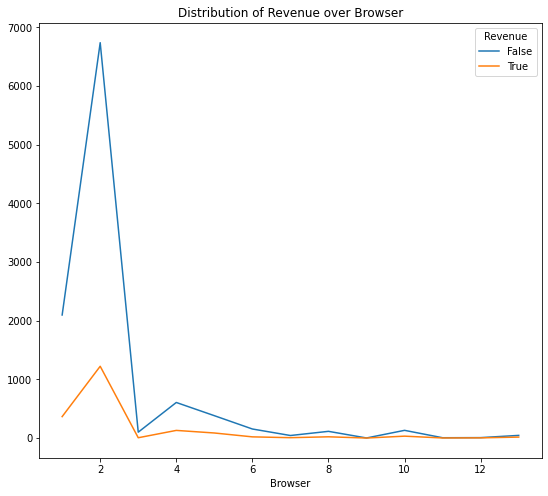

In [11]:
#Distribution of Revenue over Browser
sns.countplot(x=df['Browser'], hue="Revenue", data=data)
pd.crosstab(df['Browser'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over Browser")
plt.show();

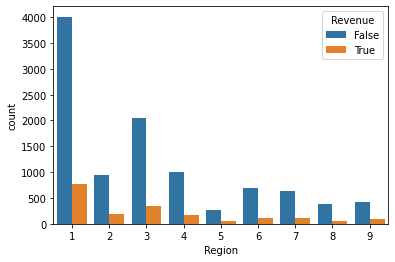

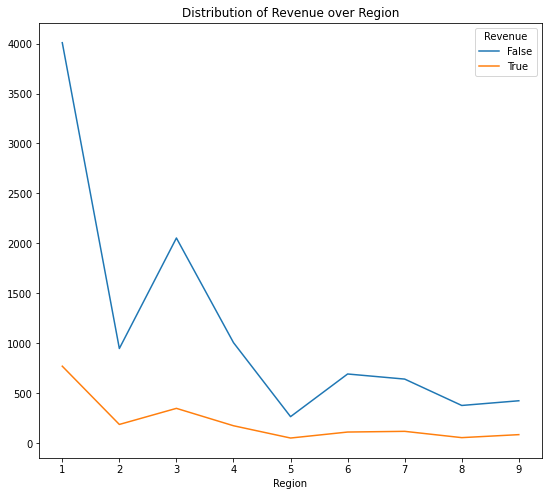

In [12]:
#Distribution of Revenue over Region
sns.countplot(x=df['Region'], hue="Revenue", data=data)
pd.crosstab(df['Region'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over Region")
plt.show();

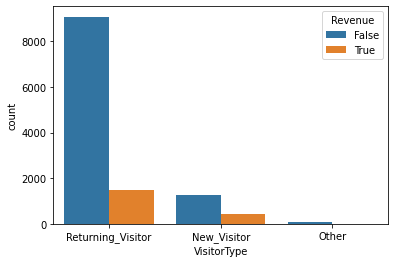

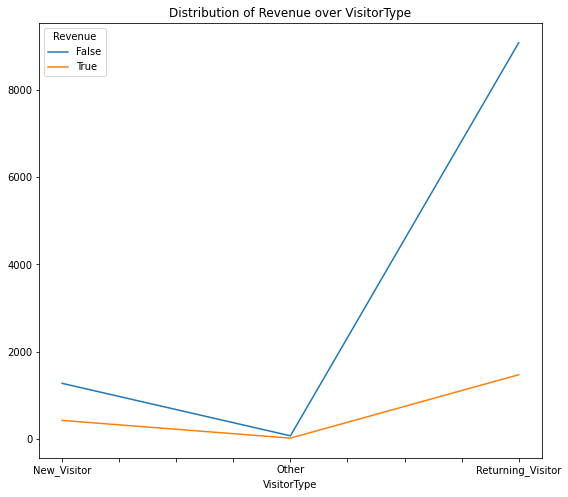

In [13]:
#Distribution of Revenue over VisitorType
sns.countplot(x=df['VisitorType'], hue="Revenue", data=data)
pd.crosstab(df['VisitorType'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over VisitorType")
plt.show();

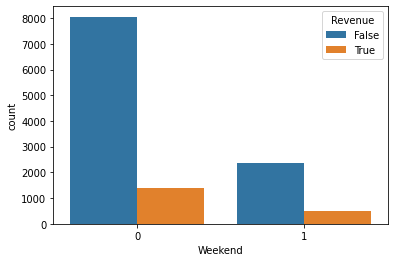

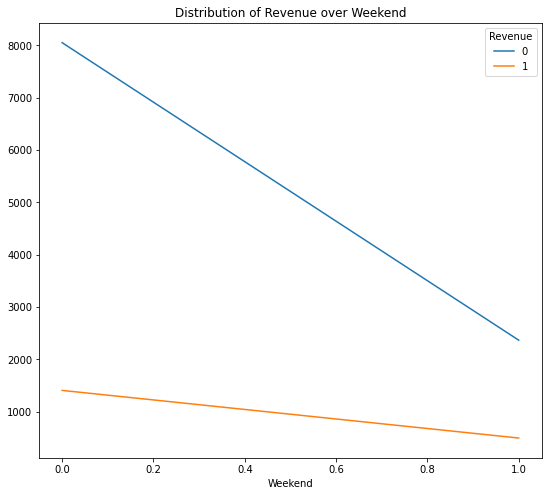

In [20]:
#Distribution of Revenue over Weekend
sns.countplot(x=df['Weekend'], hue="Revenue", data=data)
pd.crosstab(df['Weekend'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over Weekend")
plt.show();

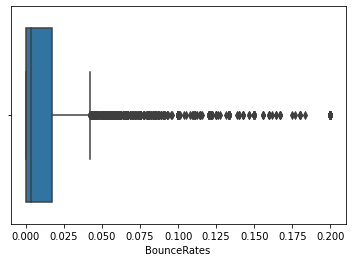

In [16]:
#Boxplot of BounceRates
ax = sns.boxplot(x=df["BounceRates"])

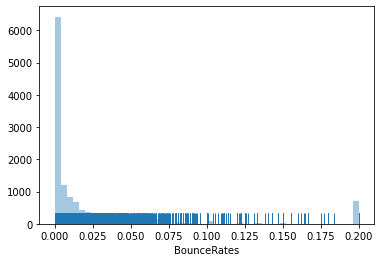

In [17]:
#Distribution of BounceRates
sns.distplot(df["BounceRates"], kde=False, rug=True);

In [18]:
#Convert VisiorType and Month to one-hot encode
df = pd.get_dummies( df, columns = ['VisitorType','Month'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,1,0,0,0,0,0,0,0


In [0]:
#Convert the data type of Weekend and Revenue to int
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

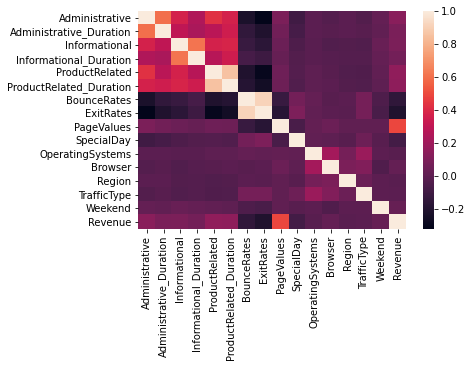

In [21]:
#Display the heatmap of correlation for all attributes
corr = data.corr()
sns.heatmap(corr)

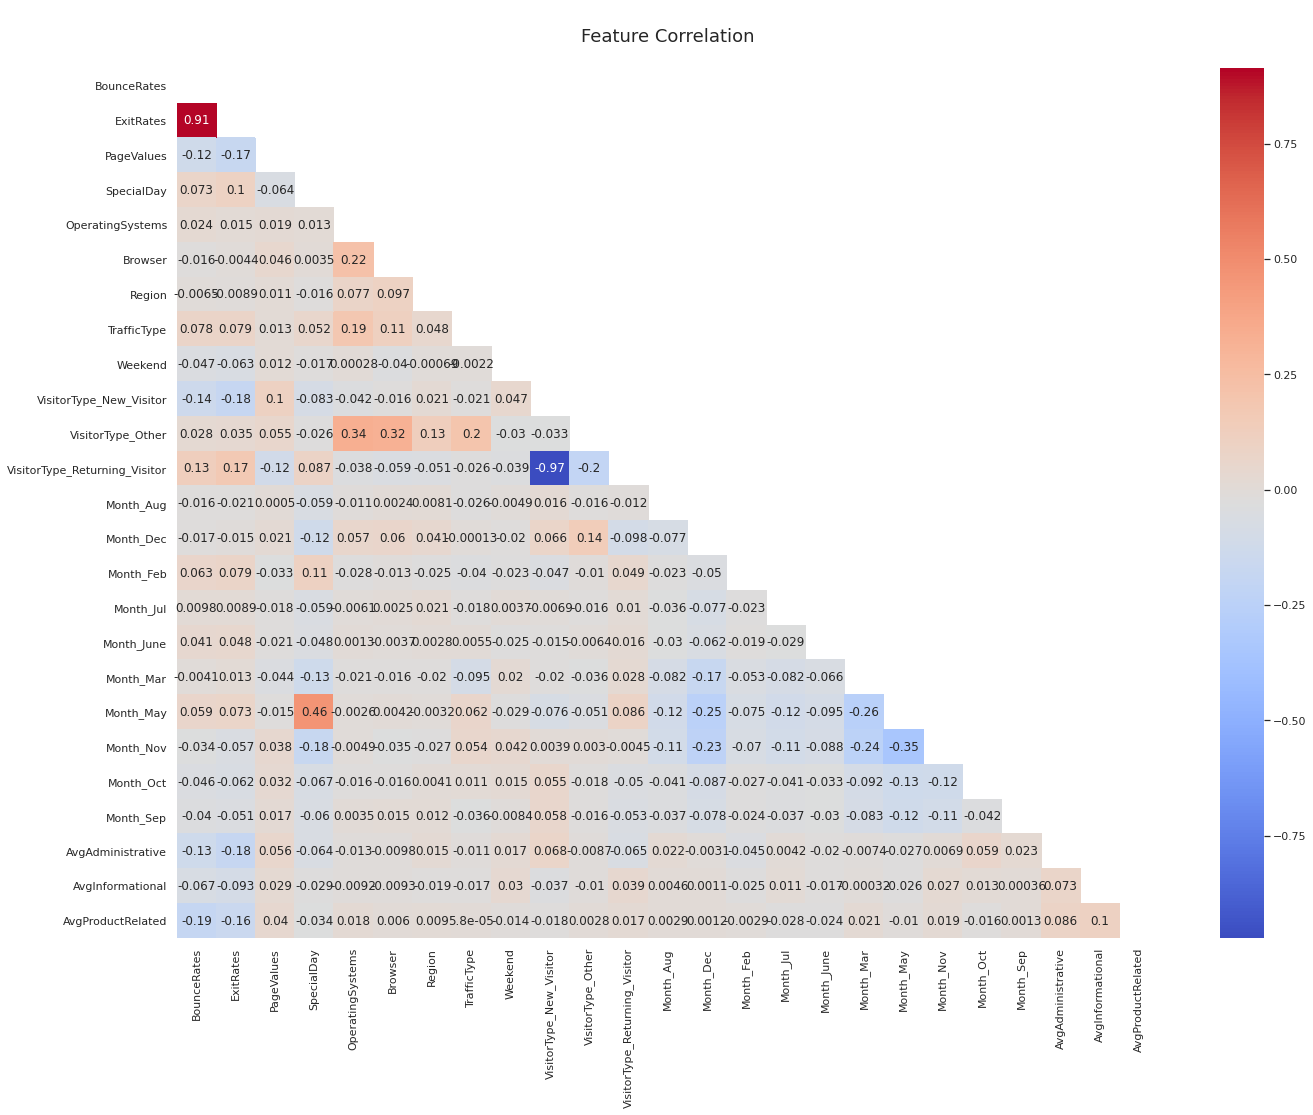

In [22]:
#-------------Code to calculate the feature correlation----------------
X = df.drop('Revenue', axis=1)  #Drop the class column 
Y = df['Revenue']

def AvgMinutes(Count, Duration): #Function to manipulate the average
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output

#Function call        
X['AvgAdministrative'] = X.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1) 
X['AvgInformational'] = X.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
X['AvgProductRelated'] = X.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
X.drop(['Administrative', 'Administrative_Duration','Informational', 
        'Informational_Duration','ProductRelated', 'ProductRelated_Duration'],axis = 1, inplace = True)

def corr_heatmap(X,title=None, file=None):
    plt.figure(figsize=(22,16))
    sns.set(font_scale=1)    
    mask = np.zeros_like(X.corr())
    mask[np.triu_indices_from(mask)] = True    
    with sns.axes_style('white'):
        sns.heatmap(X.corr(), mask = mask, annot =True, cmap='coolwarm')        
    if title: plt.title(f'\n{title}\n',fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file,bbox_inches='tight')
    plt.show()    
    return

corr_heatmap(X,"Feature Correlation")


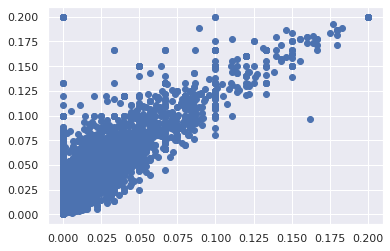

In [23]:
#Scatter plt between BounceRates and ExitRates
plt.scatter(df['BounceRates'],df['ExitRates'])
plt.show()

In [0]:
#Step 1 : Prepare Dataset for Structure Learning
x_new = data.copy()
x_new['AvgAdministrative'] = x_new.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1)
x_new['AvgInformational'] = x_new.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
x_new['AvgProductRelated'] = x_new.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
x_new.drop(['Administrative', 'Administrative_Duration','Informational', 
        'Informational_Duration','ProductRelated', 'ProductRelated_Duration'],axis = 1, inplace = True)
x_new.to_csv('online_shoppers_intention_modified.csv')

In [0]:
#Step 2: Discretize the continous variables for Structure learning
def disc(rec, m, s): # m = mean, s = Standard deviation 
  a = m+(s/2)
  b = m-(s/2) 
  if rec > a: # any value above m+(s/2) divide it in 4 intervals of size m and assign [1,4]
     if rec > a+(3*m): rec = 4
     elif rec > a+(2*m): rec = 3
     elif rec > a+m: rec = 2
     else: rec = 1
  elif rec < b: # any value below m-(s/2) divide it in 4 intervals of size m and assign [-4,-1]
     if rec < b-(3*m): rec = -4
     elif rec < b-(2*m): rec = -3
     elif rec < b-m: rec = -2
     else: rec = -1
  else: rec = 0 # any value between m-(s/2) and m+(s/2) assign 0
  return rec
c = x_new['BounceRates'].mean()
d = x_new['BounceRates'].std()
x_new['BounceRates_convert']=x_new.apply(lambda x: disc(rec = x['BounceRates'], m = c, s = d),axis = 1)
c = x_new['ExitRates'].mean()
d = x_new['ExitRates'].std()
x_new['ExitRates_convert']=x_new.apply(lambda x: disc(rec = x['ExitRates'], m = c, s = d),axis = 1)
c = x_new['PageValues'].mean()
d = x_new['PageValues'].std()
x_new['PageValues_convert']=x_new.apply(lambda x: disc(rec = x['PageValues'], m = c, s = d),axis = 1)
c = x_new['AvgAdministrative'].mean()
d = x_new['AvgAdministrative'].std()
x_new['AvgAdministrative_convert']=x_new.apply(lambda x: disc(rec = x['AvgAdministrative'], m = c, s = d),axis = 1)
c = x_new['TrafficType'].mean()
d = x_new['TrafficType'].std()
x_new['TrafficType_convert']=x_new.apply(lambda x: disc(rec = x['TrafficType'], m = c, s = d),axis = 1)
c = x_new['AvgInformational'].mean()
d = x_new['AvgInformational'].std()
x_new['AvgInformational_convert']=x_new.apply(lambda x: disc(rec = x['AvgInformational'], m = c, s = d),axis = 1)
c = x_new['AvgProductRelated'].mean()
d = x_new['AvgProductRelated'].std()
x_new['AvgProductRelated_convert']=x_new.apply(lambda x: disc(rec = x['AvgProductRelated'], m = c, s = d),axis = 1)
x_new.drop(['AvgAdministrative', 'BounceRates','AvgInformational', 
        'ExitRates','AvgProductRelated', 'PageValues','TrafficType'],axis = 1, inplace = True)
x_new.to_csv('new.csv')

In [30]:
#Split the dataset into train and test and output the shapes
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
#Assign the name of the feature columns
features = df.columns[:-1]

(9864, 25) (2466, 25)
(9864,) (2466,)


In [0]:
#Summarize the results by finding the metrics using build-in functions
def summarize_classification(y_test,y_pred): 
    
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score =  f1_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    
    
    return{'Accuracy:': acc,
           'Accuracy_count:': num_acc,
           'Precision:': prec,
           'Recall:': recall,
           'F1_score:':F1_score,
           'AUC_ROC:':auc_score}


In [0]:
def roc_build(x_train,y_train,x_test,y_test,model):      
        plt.figure(figsize=(8,6))        
        logit_roc_auc1 = roc_auc_score(y_train, model.predict(x_train))
        fpr1, tpr1, thresholds1 = roc_curve(y_train, model.predict_proba(x_train)[:,1])
        plt.plot(fpr1, tpr1, label='Class_Train (AUC = %0.2f)' % logit_roc_auc1)            
        logit_roc_auc2 = roc_auc_score(y_test, model.predict(x_test))
        fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        plt.plot(fpr2, tpr2,label='Class_Test (AUC = %0.2f)' % logit_roc_auc2)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic(ROC-AUC)')
        plt.legend(loc="lower right")
        plt.show()

In [0]:
#Function to build model of the respective classifier 'classifier_fn'
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,test_frac=0.2,
                show_plot_auc=None):
    
    # Separating the  input features (X) and target variable (y)
    X = df.drop('Revenue', axis=1)
    Y = df['Revenue']    
    # Feature Scaling
    scale_x = StandardScaler()
    x = scale_x.fit_transform(X)
    #Split the data into train and test set
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
    #Call the respective model
    model = classifier_fn(x_train,y_train)
    #Predict test data
    y_pred = model.predict(x_test)
    #Presict train data
    y_pred_train = model.predict(x_train)
    #Summarize the results
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)    
    pred_result = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})    
    model_crosstab = pd.crosstab(pred_result.y_pred,pred_result.y_test)
    #Construct ROC curve
    if show_plot_auc==True:
        roc_build(x_train,y_train,x_test,y_test,model)
    return{'training':train_summary,
          'test':test_summary,
          'confusion_matrix':model_crosstab
          }
          


In [0]:
# Display the details of the result of the classifier  
def disp_result(key):
   
        print('Classification: ',key)        
        print()
        print('Training data:-')
        for score in result[key]['training']:
            print(score,result[key]['training'][score])            
        print()
        print('Test Data:-')
        for score in result[key]['test']:
            print(score,result[key]['test'][score])            
        print()

In [54]:
#Function that defines logistic Classifier
result={}
def logistic_fn(x_train,y_train):
    model = LogisticRegression(solver='liblinear',random_state=12)
    model.fit(x_train,y_train)
    return model
#Call build_model to construct the model    
result['Revenue ~ Logistic'] = build_model(logistic_fn,'Revenue',features,X,show_plot_auc=True)
disp_result('Revenue ~ Logistic')

Classification:  Revenue ~ Logistic

Training data:-
Accuracy: 0.8869626926196269
Accuracy_count: 8749
Precision: 0.7463479415670651
Recall: 0.3781965006729475
F1_score: 0.502009825815096
AUC_ROC: 0.6776993484505821

Test Data:-
Accuracy: 0.8714517437145174
Accuracy_count: 2149
Precision: 0.7464788732394366
Recall: 0.3767772511848341
F1_score: 0.5007874015748032
AUC_ROC: 0.6751792322460374



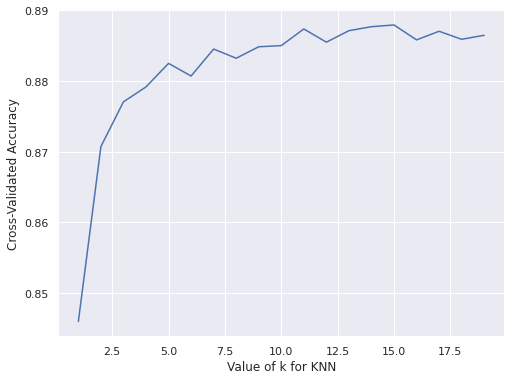

[(1, 0.8459854014598541),
 (2, 0.8707218167072183),
 (3, 0.8770478507704785),
 (4, 0.8791565287915653),
 (5, 0.8824817518248175),
 (6, 0.8806974858069747),
 (7, 0.8845093268450933),
 (8, 0.8832116788321167),
 (9, 0.8848337388483374),
 (10, 0.8849959448499594),
 (11, 0.8873479318734795),
 (12, 0.8854825628548255),
 (13, 0.8871046228710462),
 (14, 0.8876723438767234),
 (15, 0.8879156528791565),
 (16, 0.8858069748580697),
 (17, 0.8870235198702352),
 (18, 0.8858880778588807),
 (19, 0.8864557988645579)]

In [55]:
# Plot to check best value for k to chose based on the accuracy score
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(8,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

list(enumerate(k_scores,1))

In [57]:
#Function that defines KNN
result={}
def knn_fn(x_train,y_train,n_neighbors=9,random_state=12):    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)    
    return model
#Call build_model to construct the model    
result['Revenue ~ KNN'] = \
    build_model(knn_fn,'Revenue',features,df,show_plot_auc=True)
disp_result('Revenue ~ KNN')

Classification:  Revenue ~ KNN

Training data:-
Accuracy: 0.8839213300892133
Accuracy_count: 8719
Precision: 0.7846410684474123
Recall: 0.3162853297442799
F1_score: 0.4508393285371702
AUC_ROC: 0.6504439300905692

Test Data:-
Accuracy: 0.851581508515815
Accuracy_count: 2100
Precision: 0.71875
Recall: 0.21800947867298578
F1_score: 0.3345454545454546
AUC_ROC: 0.6001984771055732



In [58]:
#Function that defines Naive Bayes classifier
result={}
def naive_bayes_fn(x_train,y_train,priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train,y_train)    
    return model
#Call build_model to construct the model    
result['Revenue ~ Naive_Bayes'] = \
    build_model(naive_bayes_fn,'Revenue',features,df,show_plot_auc=True)
disp_result('Revenue ~ Naive_Bayes')

Classification:  Revenue ~ Naive_Bayes

Training data:-
Accuracy: 0.7982562854825629
Accuracy_count: 7874
Precision: 0.3957816377171216
Recall: 0.6440107671601615
F1_score: 0.49026639344262296
AUC_ROC: 0.7348127361701976

Test Data:-
Accuracy: 0.7899432278994323
Accuracy_count: 1948
Precision: 0.4215686274509804
Recall: 0.6113744075829384
F1_score: 0.4990328820116054
AUC_ROC: 0.7190922918540915



In [60]:
#Function that defines Random Forest classifier
result={}
def random_forest_fn(x_train,y_train):
    model = RandomForestClassifier(n_estimators= 50, max_depth = 15,random_state=12 )
    model.fit(x_train,y_train)    
    return model
#Call build_model to construct the model    
result['Revenue ~ Random_Forest'] = build_model(random_forest_fn,'Revenue',features,df,show_plot_auc=True)
disp_result('Revenue ~ Random_Forest')

Classification:  Revenue ~ Random_Forest

Training data:-
Accuracy: 0.9869221411192214
Accuracy_count: 9735
Precision: 0.9956172388604821
Recall: 0.9172274562584118
F1_score: 0.954816112084063
AUC_ROC: 0.9582556474416911

Test Data:-
Accuracy: 0.8921330089213301
Accuracy_count: 2200
Precision: 0.7671232876712328
Recall: 0.5308056872037915
F1_score: 0.6274509803921569
AUC_ROC: 0.7487687927212696



In [61]:
#Feature Selection using XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
XGBoost_eval_metric_y_pred = model.predict(x_test)
summarize_classification(y_test,XGBoost_eval_metric_y_pred)

{'AUC_ROC:': 0.7780959525726414,
 'Accuracy:': 0.9063260340632603,
 'Accuracy_count:': 2235,
 'F1_score:': 0.6526315789473683,
 'Precision:': 0.7209302325581395,
 'Recall:': 0.5961538461538461}

In [62]:
for features in zip(data.columns[:-1],model.feature_importances_):
     print(features)

('Administrative', 0.07857845)
('Administrative_Duration', 0.02568963)
('Informational', 0.3735299)
('Informational_Duration', 0.0)
('ProductRelated', 0.011489245)
('ProductRelated_Duration', 0.0060639656)
('BounceRates', 0.0063855513)
('ExitRates', 0.013350279)
('PageValues', 0.0045416285)
('SpecialDay', 0.024635166)
('Month', 0.0)
('OperatingSystems', 0.090459205)
('Browser', 0.008045213)
('Region', 0.02441215)
('TrafficType', 0.0050066295)
('VisitorType', 0.02312414)
('Weekend', 0.0)


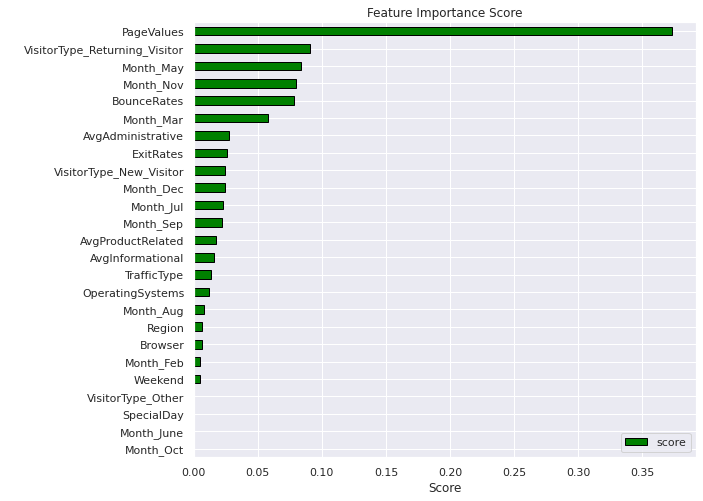

In [63]:
# Plot Horizontal bar chart for feature Importance
feature_imp = pd.DataFrame({'feature':list(X.columns[:,]),'score':model.feature_importances_})
feature_imp.sort_values('score').plot(x='feature',y='score',kind='barh',color='green',edgecolor='black',figsize=(9,8))
plt.xlabel('Score')
plt.xticks()
plt.yticks()
plt.ylabel(' ')
plt.title('Feature Importance Score')
plt.legend(loc="lower right")
plt.show();